<a href="https://colab.research.google.com/github/Baazigar007/GIS/blob/master/GIS_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import cv2
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
!pip install rasterio
import rasterio


In [6]:
from google.colab import files
files.upload()


Saving 2016_01_01_NDVI.tif to 2016_01_01_NDVI.tif
Saving 2016_01_17_NDVI.tif to 2016_01_17_NDVI.tif
Saving 2016_02_02.tif to 2016_02_02.tif
Saving 2016_02_18.tif to 2016_02_18.tif
Saving 2016_04_06_NDVI.tif to 2016_04_06_NDVI.tif
Saving 2016_04_22_NDVI.tif to 2016_04_22_NDVI.tif
Saving 2016_05_08.tif to 2016_05_08.tif
Saving 2016_05_24.tif to 2016_05_24.tif
Saving 2016_07_11.tif to 2016_07_11.tif
Saving 2016_07_27.tif to 2016_07_27.tif
Saving 2016_08_12.tif to 2016_08_12.tif
Saving 2016_08_28.tif to 2016_08_28.tif
Saving 2016_10_15_ndvi.tif to 2016_10_15_ndvi.tif
Saving 2016_11_16.tif to 2016_11_16.tif


(62, 81)
<class 'rasterio.io.DatasetReader'>
[[[4256. 4269. 3752. ... 2412. 4027. 3669.]
  [4287. 4439. 3154. ... 2412. 3502. 3502.]
  [4610. 4976. 4136. ... 4370. 2611. 2258.]
  ...
  [4340. 4324. 4360. ... 4550. 4115. 4244.]
  [4289. 4279. 4345. ... 5202. 4445. 5253.]
  [4248. 4279. 4170. ... 5627. 5072. 4809.]]]
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 81, 'height': 62, 'count': 1, 'crs': CRS.from_wkt('PROJCS["MODIS Sinusoidal",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'), 'transform': Affine(249.99999999999997, 0.0, 8066640.646011997,
       0.0, -250.00000000000009, 2054554.6769939968)}


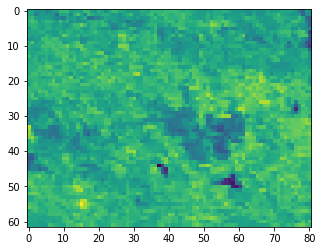

4529.2666
4590.0
714.1152
509960.5
4162.5
4590.0
4993.0


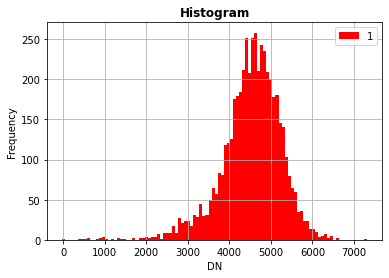

In [34]:
band = rasterio.open("/content/2016_10_15_ndvi.tif")
print (band.shape)
print (type(band))
array=band.read()
print (array)
print (band.meta)
time.sleep(5)
import matplotlib
time.sleep(5)
rasterio.plot.show(array,adjust='linear')
print (np.nanmean(array))
print (np.nanmedian(array))
print (np.nanstd(array))
print (np.nanvar(array))
print (np.nanpercentile(array, 25, axis=None, interpolation='linear'))
print (np.nanpercentile(array, 50, axis=None, interpolation='linear'))
print (np.nanpercentile(array, 75, axis=None, interpolation='linear'))
from rasterio.plot import show_hist
show_hist(band, bins=100, lw=0.0, stacked=True, alpha=1,
      histtype='stepfilled', title="Histogram")

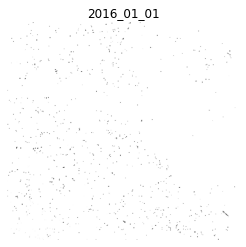

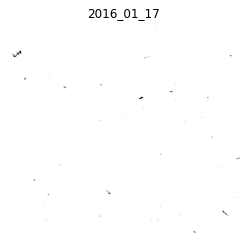

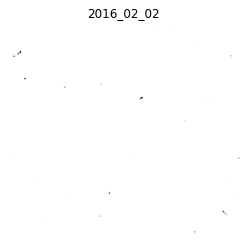

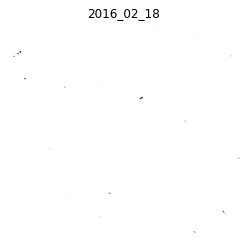

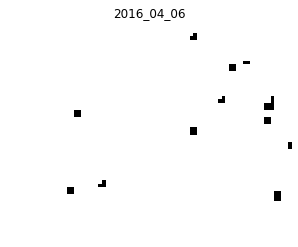

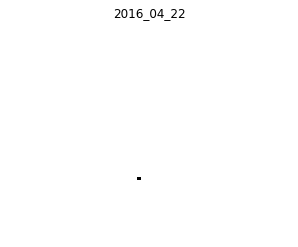

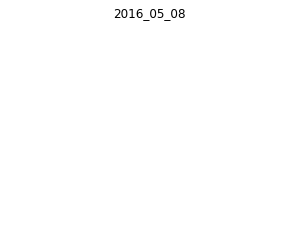

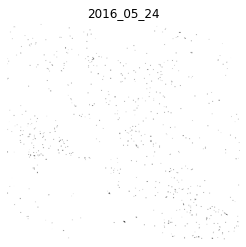

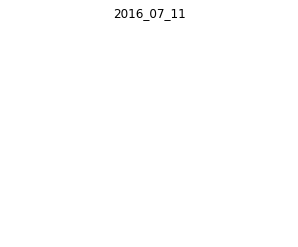

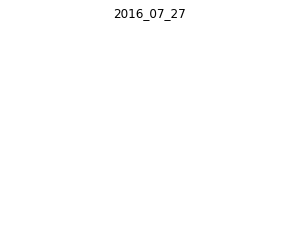

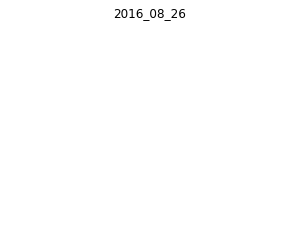

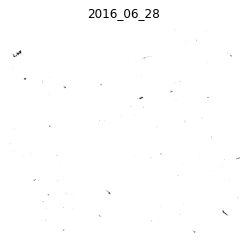

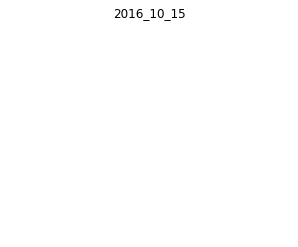

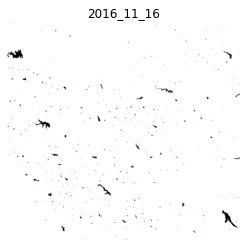

In [47]:
import cv2
import glob
path = "/content/*.*"
names = ['2016_01_01','2016_01_17','2016_02_02','2016_02_18','2016_04_06','2016_04_22','2016_05_08','2016_05_24','2016_07_11','2016_07_27','2016_08_26','2016_06_28','2016_10_15','2016_11_16']
i=0
for file in glob.glob(path):
   a = plt.imread(file)
   plt.imshow(a)
   plt.axis('off')
   plt.title(names[i])
   time.sleep(5)
   i+=1
   plt.show()
#print(file)
#a= cv2.imread(file)
#print(a)
#image = plt.imread("/content/12_Aug_2016.tif")
#plt.imshow(image)
#plt.show()

In [48]:
mean={}
median={}
std={}
var={}
i=0
for file in glob.glob(path):
  band = rasterio.open(file)
  print (band.meta)
  array = band.read()
  mean[names[i]]=np.nanmean(array)
  median[names[i]]=np.nanmedian(array)
  std[names[i]]=np.nanstd(array)
  var[names[i]]=np.nanvar(array)
  #mean.append(np.nanmean(array))
  #median.append(np.nanmedian(array))
  #std.append(np.nanstd(array))
  #var.append(np.nanstd(array))
  i+=1
  time.sleep(5)
print (mean,median,std,var)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 828, 'height': 775, 'count': 1, 'crs': CRS.from_wkt('PROJCS["MODIS Sinusoidal",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'), 'transform': Affine(249.99999999999997, 0.0, 7989890.646011997,
       0.0, -250.00000000000009, 2156554.676993997)}
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 828, 'height': 775, 'count': 1, 'crs': CRS.from_wkt('PROJCS["MODIS Sinusoidal",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Sinus

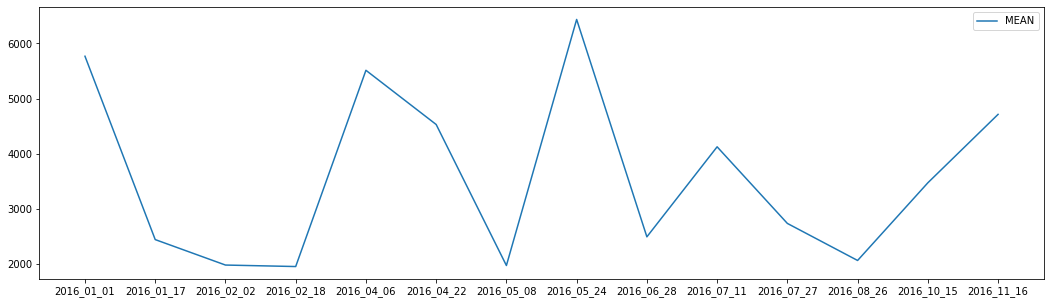

In [85]:
lists = sorted(mean.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
#plt.plot(x, y)
plt.figure(figsize=(18,5))
plt.plot(x,y)
plt.legend(["MEAN"])
plt.show()

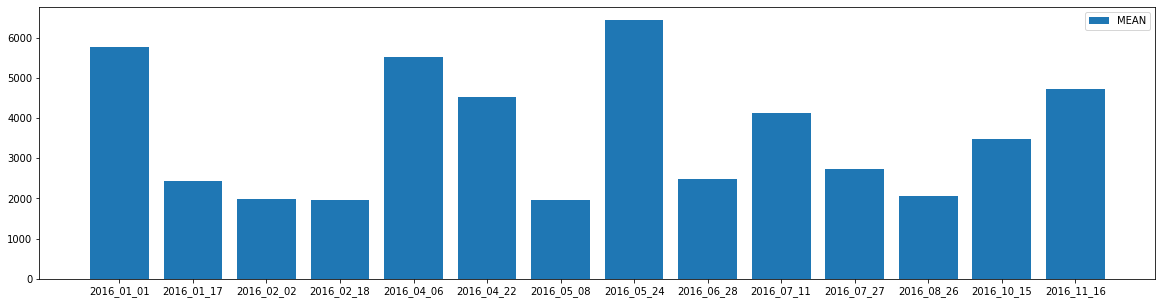

In [86]:
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.legend(['MEAN'])
plt.show()

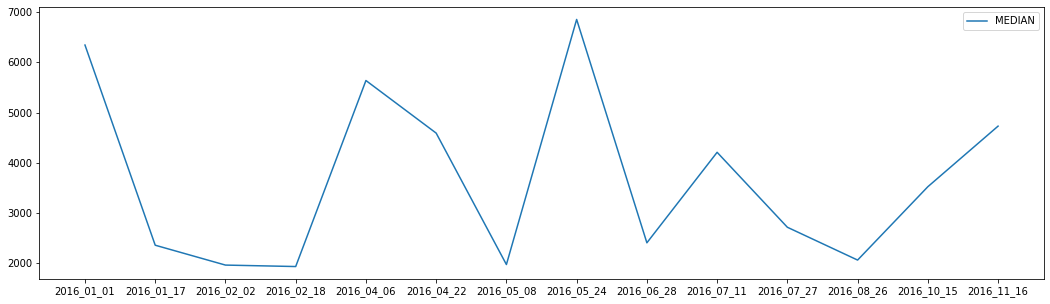

In [89]:
lists = sorted(median.items()) 
x, y = zip(*lists) 
plt.figure(figsize=(18,5))
plt.plot(x,y)
plt.legend(['MEDIAN'])

plt.show()

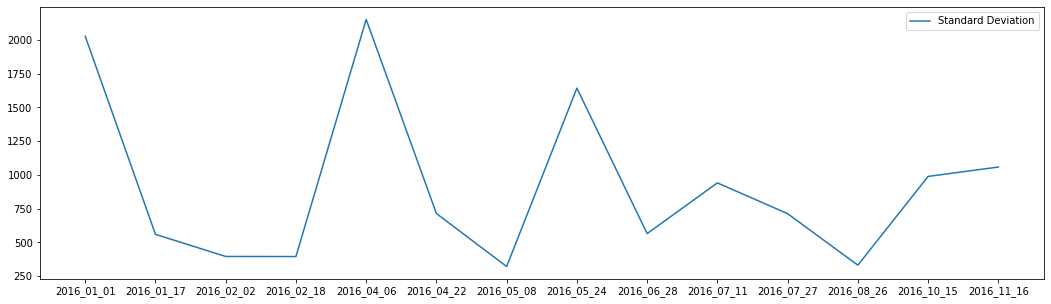

In [90]:
lists = sorted(std.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
#plt.plot(x, y)
plt.figure(figsize=(18,5))
plt.plot(x,y)
plt.legend(['Standard Deviation'])
plt.show()

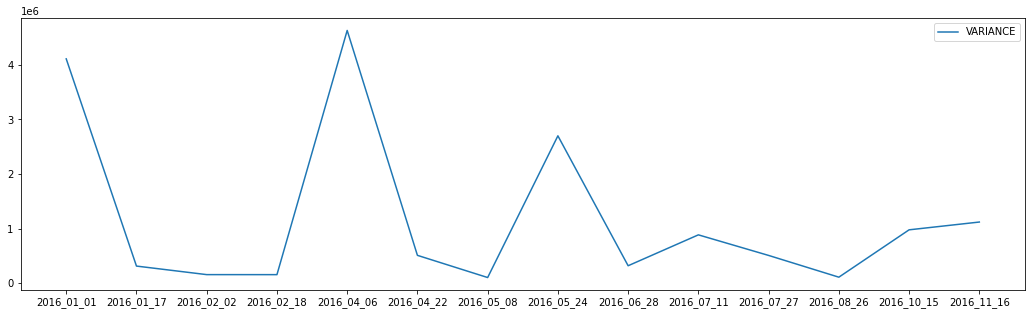

In [91]:
lists = sorted(var.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
#plt.plot(x, y)
plt.figure(figsize=(18,5))
plt.plot(x,y)
plt.legend(['VARIANCE'])
plt.show()

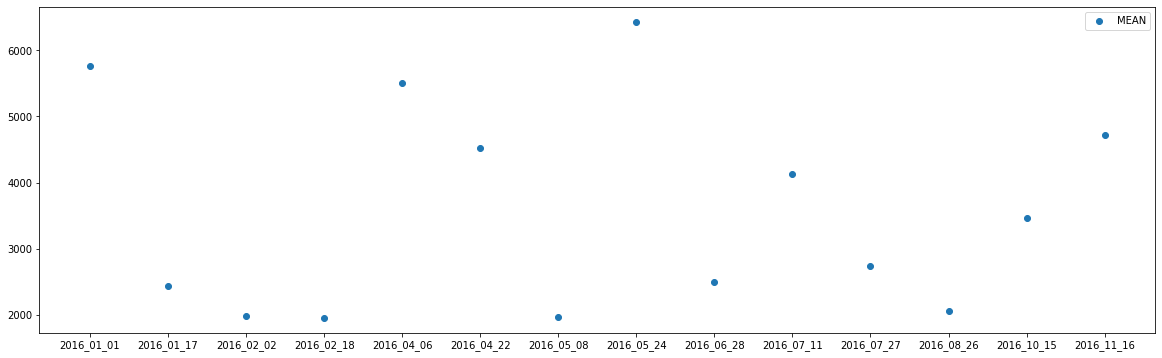

In [92]:
lists = sorted(mean.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
#plt.plot(x, y)
plt.figure(figsize=(20,6))
plt.scatter(x,y)
plt.legend(['MEAN'])
plt.show()
